# Лабораторная работа №1

Численная реализация интегральных преобразований в конечных пределах.

> Вариант 7

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.special

In [2]:
def versions():
    from datetime import datetime
    print("Notebook date:", datetime.now())

    import numpy as np
    print("NumPy:", np.__version__)

    import scipy as sc
    print("SciPy:", sc.__version__)

    import matplotlib
    print("Matplotlib:", matplotlib.__version__)

    import sys
    print("Python:", sys.version)

versions()

Notebook date: 2020-04-30 23:35:59.669970
NumPy: 1.18.3
SciPy: 1.4.1
Matplotlib: 3.2.1
Python: 3.7.3 (default, Apr 09 2019, 05:18:21) [GCC]


#### Исходные функции

In [3]:
def j0(x):
    """Функция Бесселя порядка 0."""
    return scipy.special.j0(x)


def kernel(ksi, x, alpha=1.0):
    """Вычисление ядра интегрального преобразования."""
    return j0(alpha * ksi * x) * x


def impulse(x):
    """Вычисление импульса входного сигнала."""
    return np.exp(1j * x / 10)

#### Параметры интегрирования

In [4]:
a, b = 0, 5
p, q = 0, 5
m, n = 1000, 1000

In [5]:
# Входной сигнал в матричном виде.
matrix_f = impulse(np.arange(a, b, step=(b - a) / n))

# Матрица A.
ksi_l, x_k = np.mgrid[p : q : (q - p) / m, a : b : (b - a) / n]

matrix_A = kernel(ksi=ksi_l, x=x_k)

# Результат умножения.
matrix_F = matrix_A.dot(matrix_f) * (b - a) / n

# Вычисление амплитуды и фазы.
amplitude_f = np.absolute(matrix_f)
phase_f = np.angle(matrix_f)

amplitude_F = np.absolute(matrix_F)
phase_F = np.angle(matrix_F)

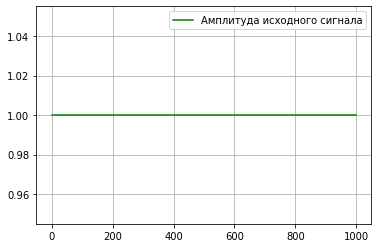

In [6]:
plt.plot(amplitude_f, c="g", label="Амплитуда исходного сигнала")
plt.legend()
plt.grid()
plt.show()

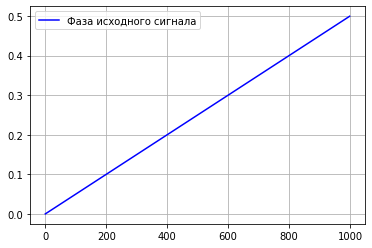

In [7]:
plt.plot(phase_f, c="b", label="Фаза исходного сигнала")
plt.legend()
plt.grid()
plt.show()

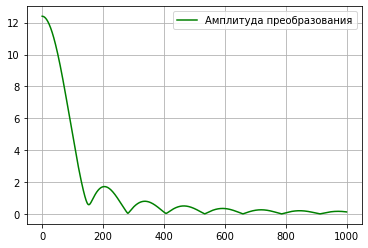

In [8]:
plt.plot(amplitude_F, c="g", label="Амплитуда преобразования")
plt.legend()
plt.grid()
plt.show()

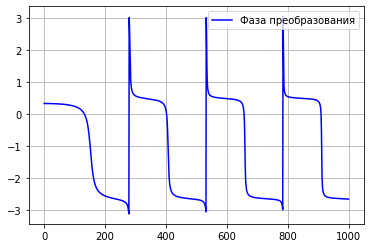

In [9]:
plt.plot(phase_F, c="b", label="Фаза преобразования")
plt.legend()
plt.grid()
plt.show()